In [12]:
import numpy as np
import h5py
from matplotlib import pyplot as plt
import cv2
import pandas as pd

# number of frames in the file
Len = 600

# filename
File = 'AEQ31_edi_20181002_049_161934'


with h5py.File(f'C:/TDK/adatok/{File}.h5', 'r') as hdf:
    roip = hdf.get('ROIP')
    roip1 = roip.get('ROIP1')
    roip1_data = roip1.get('ROIP1Data')
    
    frames = []
    List = []
    
    for i in range(Len):
        
        image = np.array(roip1_data[100:230, 475:560, i])

        # scale the image
        image = cv2.normalize(image, dst=None, alpha=0, beta=65535, norm_type=cv2.NORM_MINMAX)

        # uint16 to uint8 so we can use cv2 functions properly
        image = cv2.convertScaleAbs(image, alpha=(255.0/65535.0))
        
        # using median filter
        blur = cv2.medianBlur(image, 3)
        
        # binarization
        thresh = cv2.threshold(blur, 170, 255, cv2.THRESH_BINARY)[1]
        
        # counting the nonzero pixel values in the image
        nzCount = cv2.countNonZero(thresh)
        
        # adding number of nonzero pixels to predifined list
        frames.append(nzCount)
        
        # adding the number of the frames and binary value of hotspot to
        if nzCount == 0:
            List.append('no')
        else:
            List.append('yes')

# plotting number of nonzero pixels per frame and saving it to .png
plt.figure(figsize=(15, 8))
plt.plot(frames)
plt.title(f'{File}', size=12)
plt.xlabel('Frames', size=12)
plt.ylabel('Number of nonzero pixels', size=12)
plt.savefig(f'{File}.png')   # save the figure to file
plt.close()        

# saving the number of the frames and binary value of hotspot to .csv
df = pd.DataFrame(List, columns=['Hotspot?'])
df.to_csv(f'{File}')

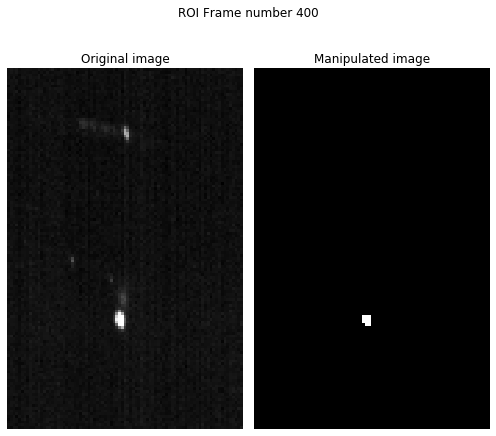

In [11]:
'''
This cell is only for checking the images of a frame
'''


with h5py.File(f'C:/TDK/adatok/{File}.h5', 'r') as hdf:
    roip = hdf.get('ROIP')
    roip1 = roip.get('ROIP1')
    roip1_data = roip1.get('ROIP1Data')
    
    frames = []
        
    image = np.array(roip1_data[100:230, 475:560, 400])

    # scale the image
    image = cv2.normalize(image, dst=None, alpha=0, beta=65535, norm_type=cv2.NORM_MINMAX)

    # uint16 to uint8 so we can use cv2 functions properly
    image = cv2.convertScaleAbs(image, alpha=(255.0/65535.0))
        
    # using median filter
    blur = cv2.medianBlur(image, 3)
        
    # binarization
    thresh = cv2.threshold(blur, 170, 255, cv2.THRESH_BINARY)[1]
        
    # plotting the original and the manipulated image of the roi
    plt.figure(figsize=(7,7))
    plt.suptitle('ROI Frame number 400')
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(thresh, cmap='gray')
    plt.title('Manipulated image')
    plt.axis('off')
    
    plt.tight_layout()
        